<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/timeseries/analysis_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!/bin/bash
!curl -L -o ./daily-climate-time-series-data.zip\
  https://www.kaggle.com/api/v1/datasets/download/sumanthvrao/daily-climate-time-series-data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22518  100 22518    0     0  52727      0 --:--:-- --:--:-- --:--:-- 52727


In [2]:
!unzip daily-climate-time-series-data.zip

Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [3]:
import pandas as pd
import numpy as np

climate_train = pd.read_csv('DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col='date')

### Line plots

<Axes: xlabel='date'>

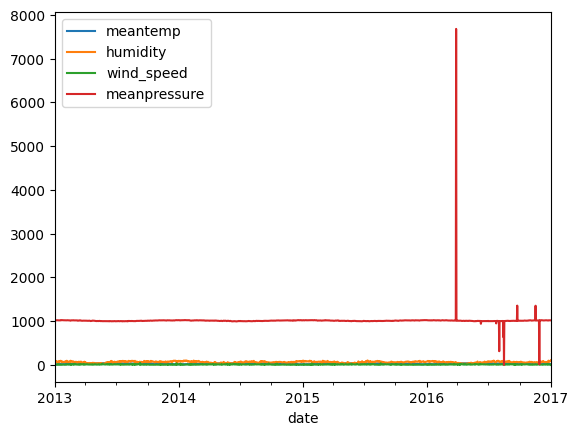

In [4]:
climate_train.plot()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

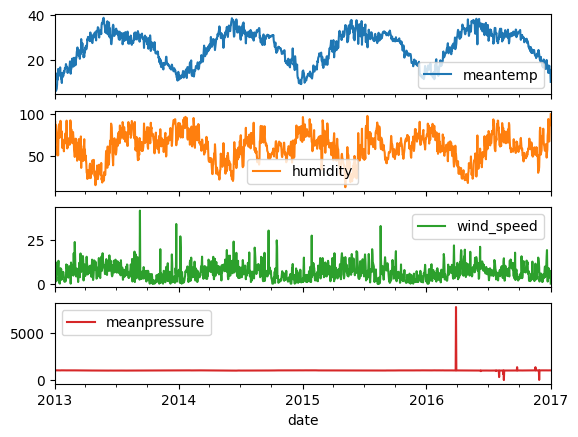

In [5]:
climate_train.plot(subplots=True)

### Rolling mean

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

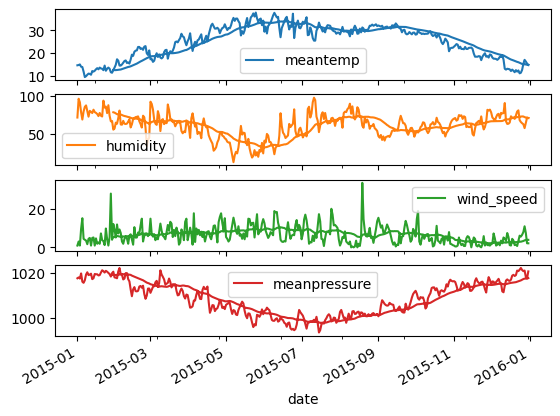

In [6]:
climate_train_subset = climate_train.loc['2015']
rolling_30 = climate_train_subset.rolling(30).mean()
pd.concat([climate_train_subset, rolling_30]).plot(subplots=True)

### Rolling mean with confidence *interval*

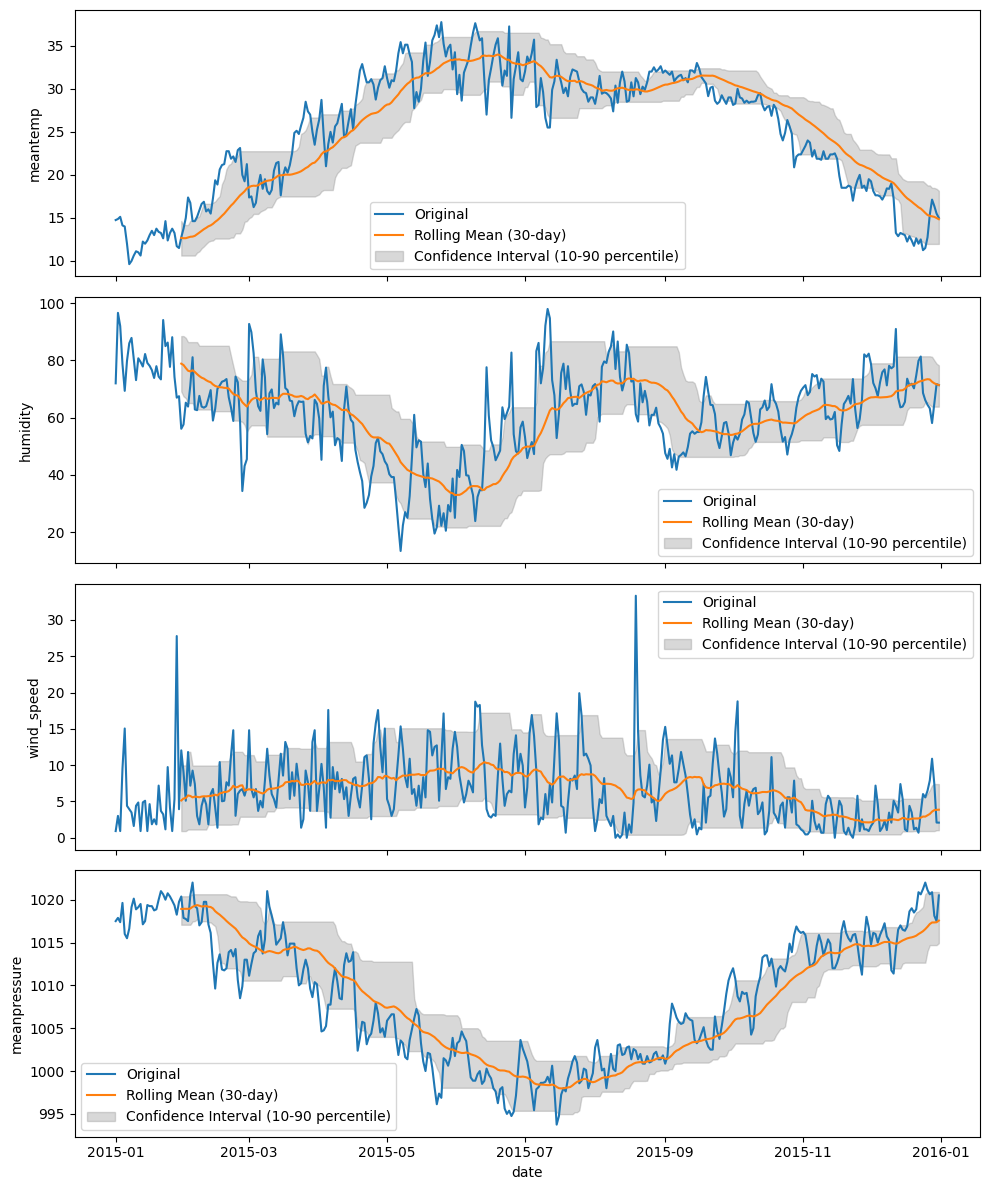

In [10]:
import matplotlib.pyplot as plt

rolling_10 = climate_train_subset.rolling(30).quantile(0.1)
rolling_90 = climate_train_subset.rolling(30).quantile(0.9)
rolling_30 = climate_train_subset.rolling(30).mean() # Re-calculating rolling_30 for clarity

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 12))

for i, col in enumerate(climate_train_subset.columns):
    axes[i].plot(climate_train_subset.index, climate_train_subset[col], label='Original')
    axes[i].plot(rolling_30.index, rolling_30[col], label='Rolling Mean (30-day)')
    axes[i].fill_between(rolling_10.index, rolling_10[col], rolling_90[col], color='gray', alpha=0.3, label='Confidence Interval (10-90 percentile)')
    axes[i].set_ylabel(col)
    axes[i].legend()

plt.xlabel('date')
plt.tight_layout()
plt.show()

### ACF plots

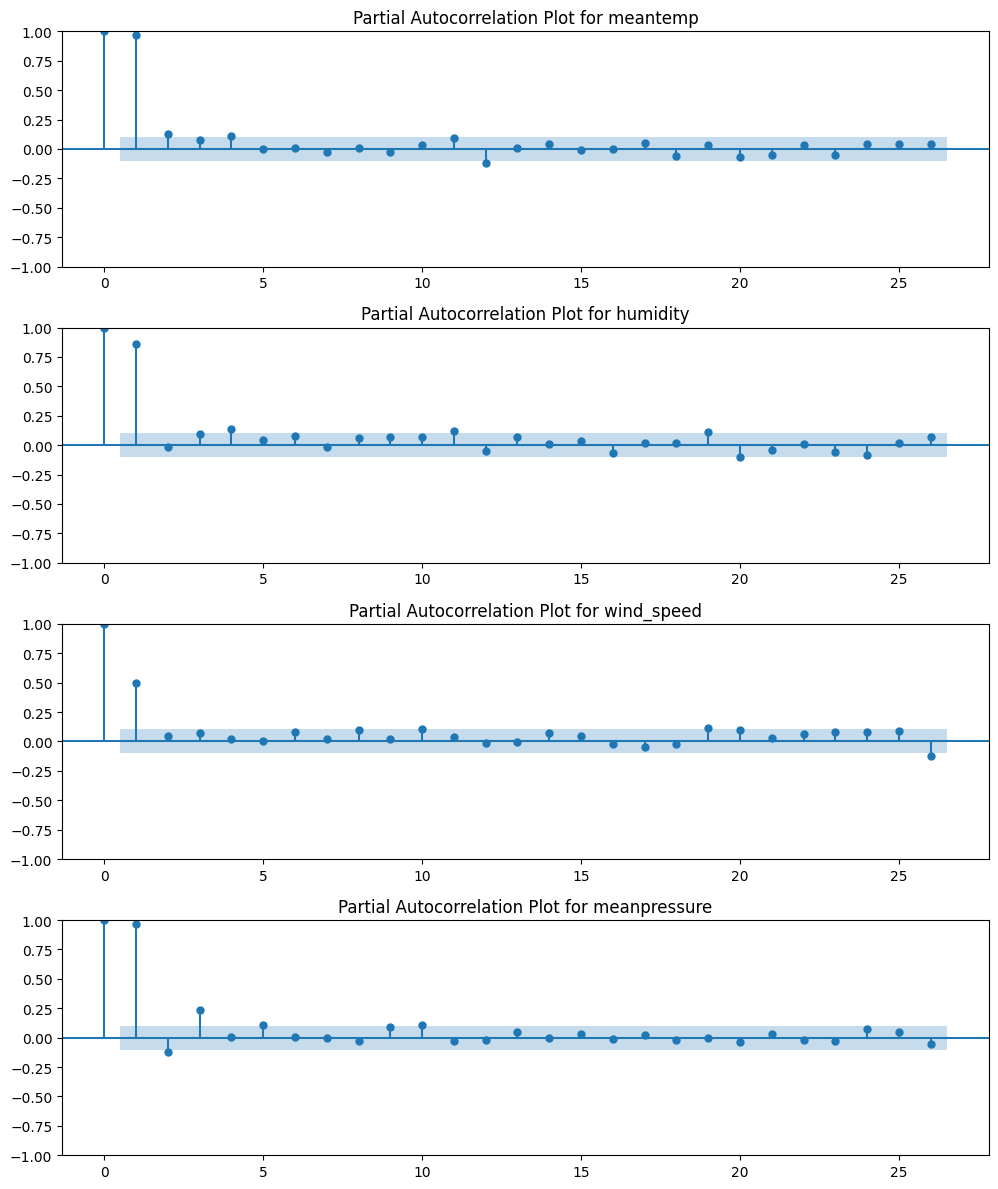

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

for i, col in enumerate(climate_train_subset.columns):
    plot_pacf(climate_train_subset[col].dropna(), ax=axes[i], method='ywm')
    axes[i].set_title(f'Partial Autocorrelation Plot for {col}')

plt.tight_layout()
plt.show()

### Seasonality

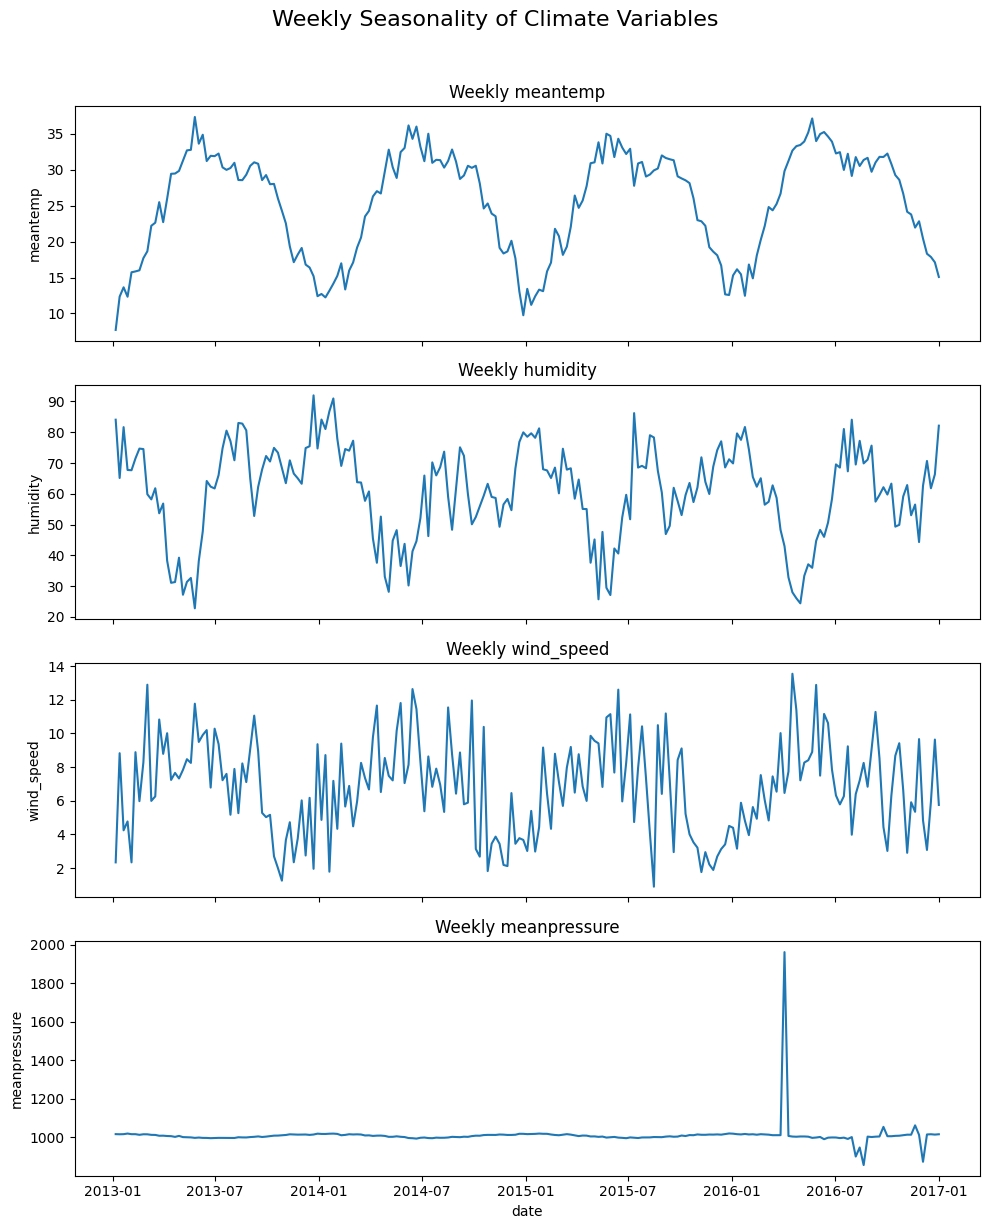

In [15]:
# Resample the data to a weekly frequency
climate_train_weekly = climate_train.resample('W').mean()

# Create subplots and plot the weekly resampled data
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 12))
fig.suptitle('Weekly Seasonality of Climate Variables', y=1.02, fontsize=16)

for i, col in enumerate(climate_train_weekly.columns):
    axes[i].plot(climate_train_weekly.index, climate_train_weekly[col])
    axes[i].set_title(f'Weekly {col}')
    axes[i].set_ylabel(col)

plt.xlabel('date')
plt.tight_layout()
plt.show()

### Box plots

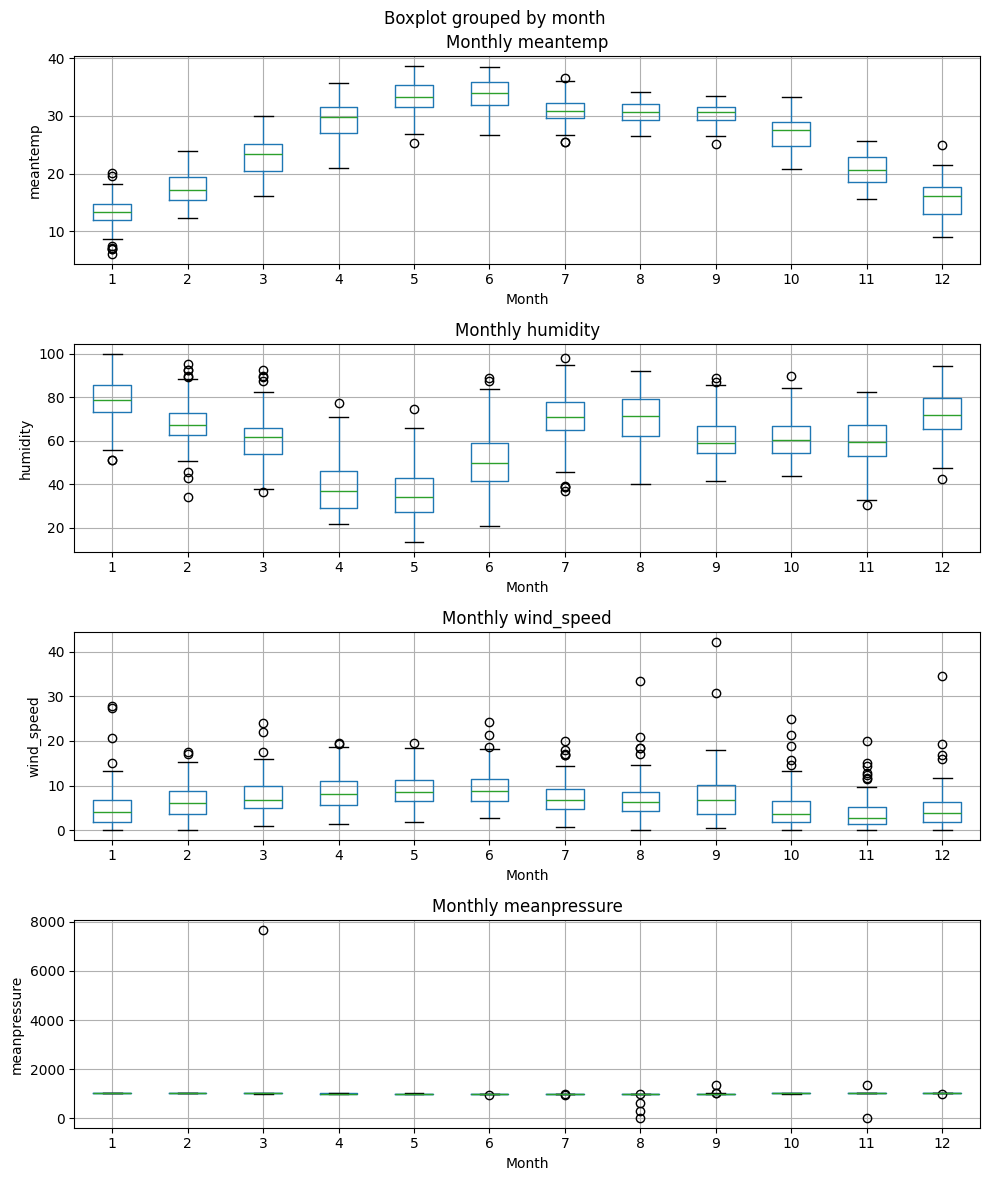

In [17]:
climate_train['month'] = climate_train.index.month

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))
fig.suptitle('Monthly Box Plots of Climate Variables', y=1.02, fontsize=16)

for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure']):
    climate_train.boxplot(column=col, by='month', ax=axes[i])
    axes[i].set_title(f'Monthly {col}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### Violin plots

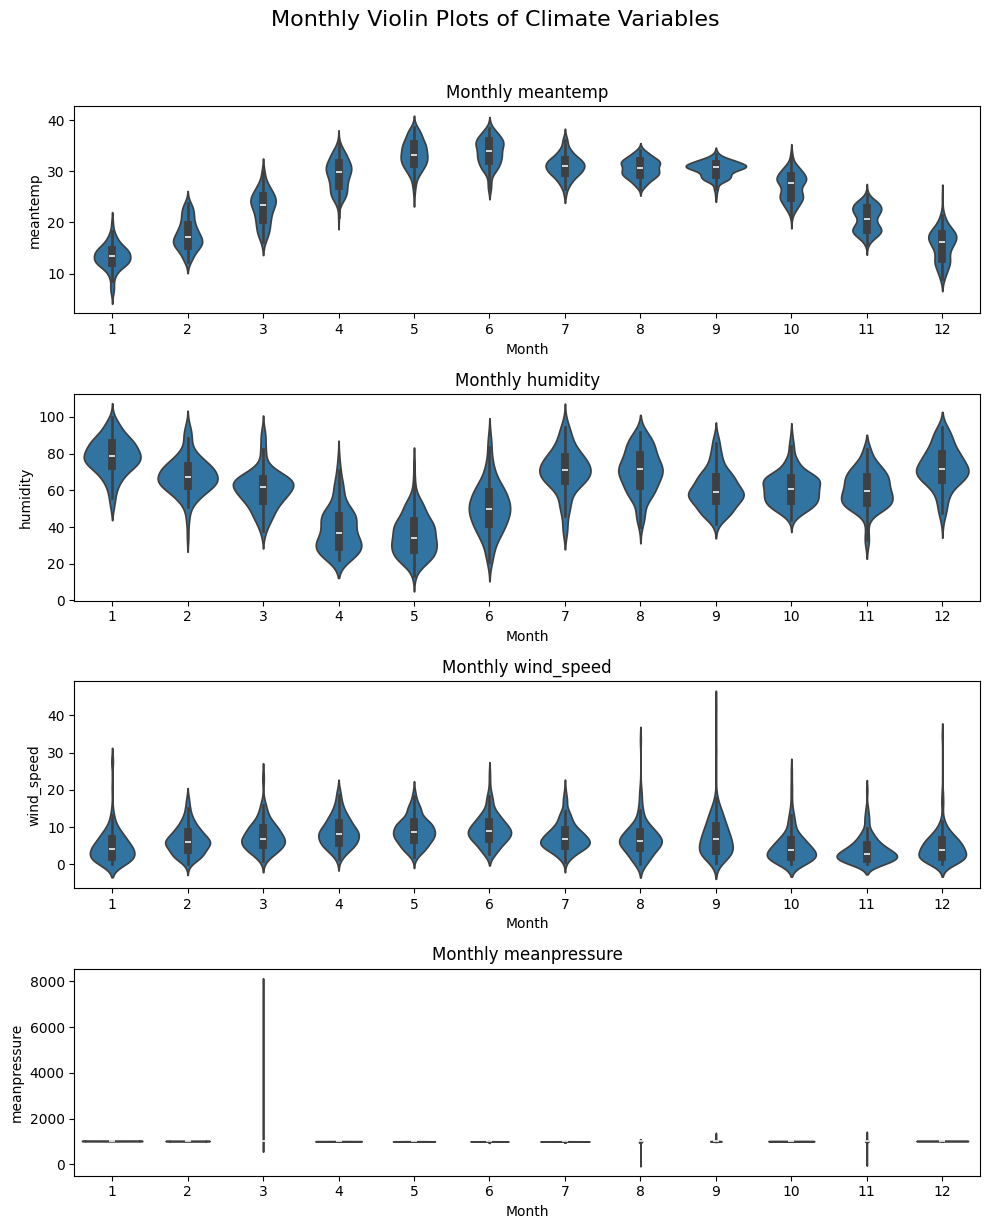

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'month' column exists
if 'month' not in climate_train.columns:
    climate_train['month'] = climate_train.index.month

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))
fig.suptitle('Monthly Violin Plots of Climate Variables', y=1.02, fontsize=16)

for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure']):
    sns.violinplot(x='month', y=col, data=climate_train, ax=axes[i])
    axes[i].set_title(f'Monthly {col}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### Polar plots

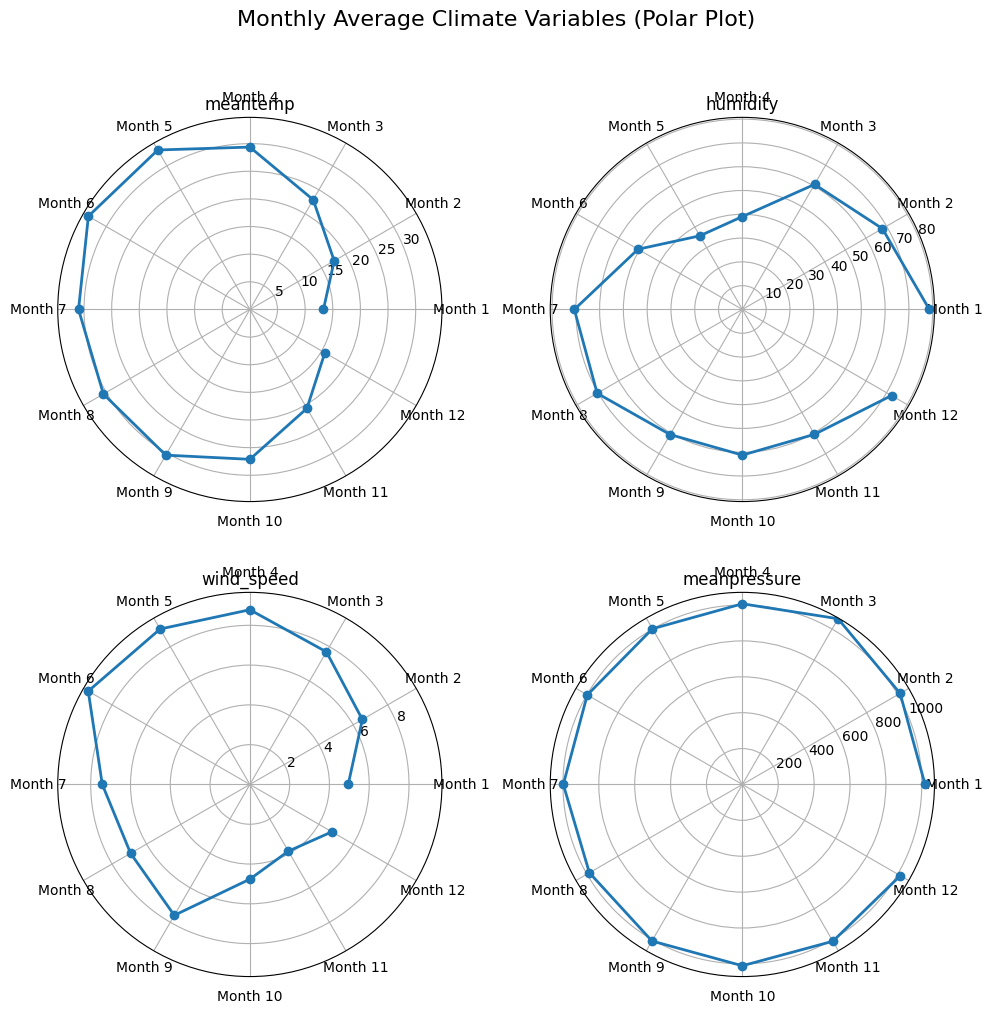

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average value for each month
monthly_avg = climate_train.groupby('month').mean()

# Define the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(monthly_avg), endpoint=False)

# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), subplot_kw={'projection': 'polar'})
fig.suptitle('Monthly Average Climate Variables (Polar Plot)', y=1.02, fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable on a polar axis
for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure']):
    axes[i].plot(angles, monthly_avg[col], 'o-', linewidth=2)
    axes[i].set_title(col)
    axes[i].set_xticks(angles)
    axes[i].set_xticklabels([f'Month {m}' for m in monthly_avg.index])
    axes[i].grid(True)

plt.tight_layout()
plt.show()

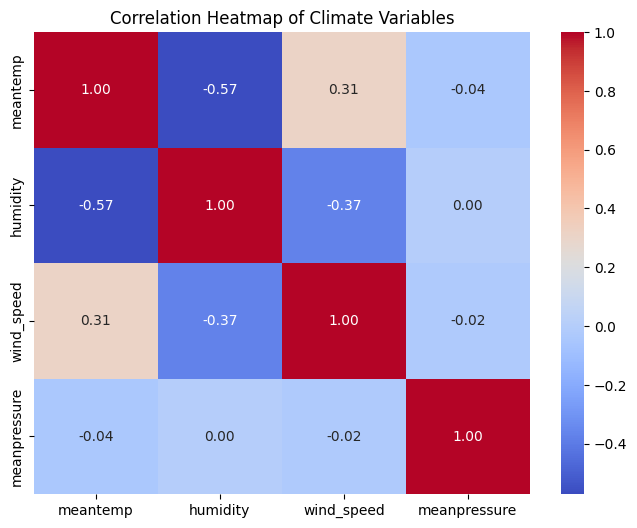

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = climate_train.drop(columns=['month']).corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Climate Variables')
plt.show()

### Missing values

In [23]:
# Identify missing data
print("Missing values before filling:")
print(climate_train.isnull().sum())

# Calculate rolling window average
# You can adjust the window size as needed
rolling_avg = climate_train.rolling(window=7, center=True).mean()

display(rolling_avg.head())

Missing values before filling:
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
month           0
dtype: int64


,meantemp,humidity,wind_speed,meanpressure,month
date,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,7.604762,83.295238,2.903810,1017.685714,1.0
2013-01-05,7.441497,80.325850,3.924218,1018.121088,1.0


In [25]:
# Fill missing data with rolling window average
climate_train_filled = climate_train.fillna(rolling_avg)

# Verify changes
print("\nMissing values after filling:")
print(climate_train_filled.isnull().sum())

display(climate_train_filled.head())


Missing values after filling:
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
month           0
dtype: int64


,meantemp,humidity,wind_speed,meanpressure,month
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1


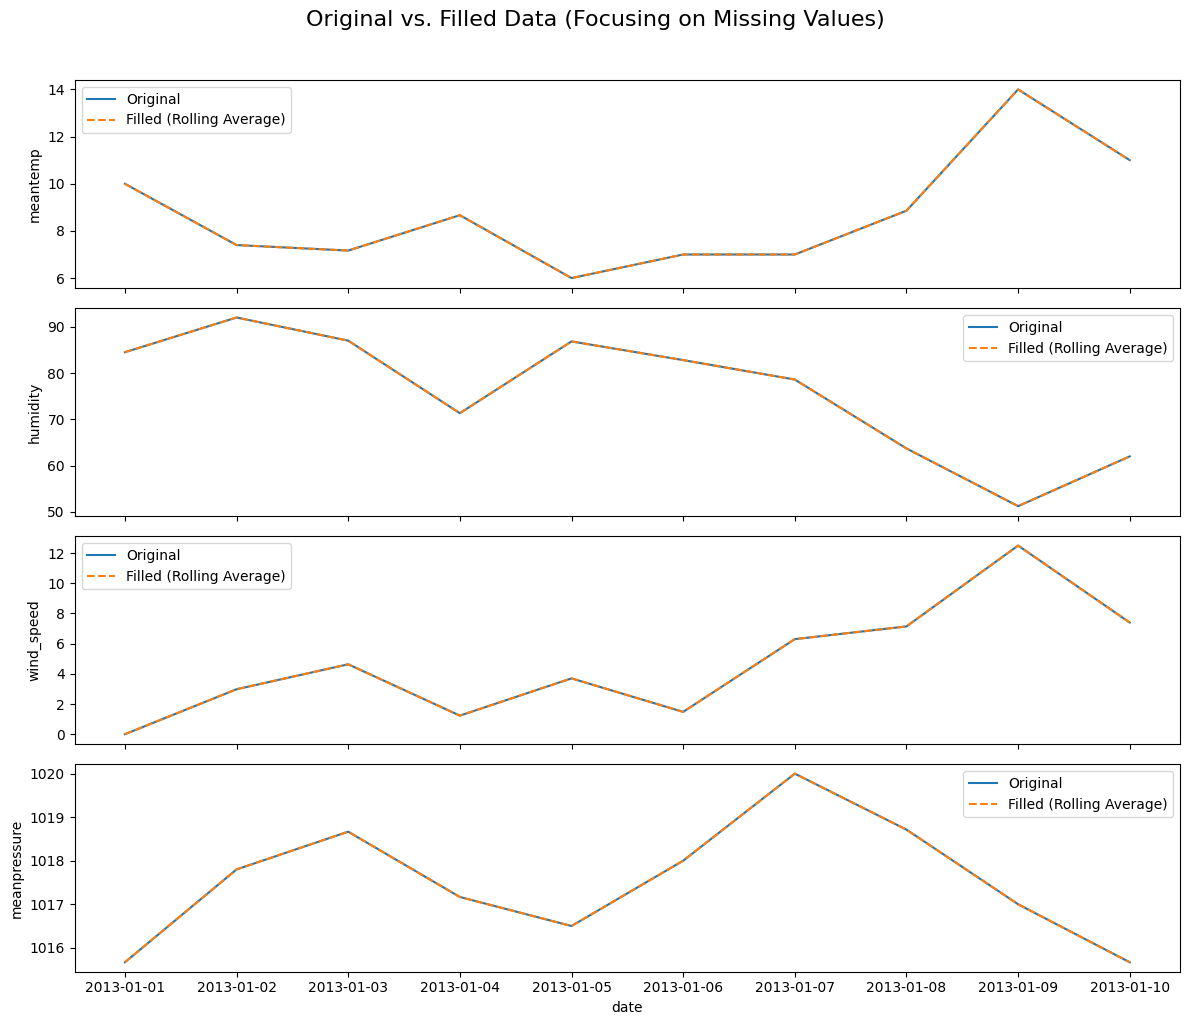

In [30]:
import matplotlib.pyplot as plt

# Find the rows with missing values in the original data
missing_rows = climate_train.isnull().any(axis=1)

# Select a time range to plot where missing values were present
# Adjust the date range as needed to clearly show the filled values
start_date = '2013-01-01'
end_date = '2013-01-10'

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 10))
fig.suptitle('Original vs. Filled Data (Focusing on Missing Values)', y=1.02, fontsize=16)

for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure']):
    axes[i].plot(climate_train.loc[start_date:end_date, col], label='Original')
    axes[i].plot(climate_train_filled.loc[start_date:end_date, col], label='Filled (Rolling Average)', linestyle="--")
    axes[i].set_ylabel(col)
    axes[i].legend()

plt.xlabel('date')
plt.tight_layout()
plt.show()